In [ ]:
import serial 
import time
import re
import codecs
#import space


In [2]:

comPort = serial.Serial(port='COM5', baudrate=9600, timeout=1) 
while True:
    buffer = comPort.read(200)
    decoded_string = codecs.decode(buffer, 'utf-8')
    #print(buffer)
    #print(decoded_string)
    time.sleep(0.1) 
    # Decode the input bytes to string
    decoded_string = str(buffer)
    # Split the string by '/'
    print(decoded_string)
    data_segments = re.split(r'/', decoded_string)

    # Initialize the 2D array
    data_array = []

    # Parse each segment
    for segment in data_segments:
        print(segment)
        if 'Flowmeter' in segment:
            #print("jeff")
            flowmeter_match = re.search(r'Flowmeter (\d) reads ([\d\.]+)V', segment)
            if flowmeter_match:
                meter_number = int(flowmeter_match.group(1))
                value = float(flowmeter_match.group(2))
                data_array.append([time.time(),'Flowmeter', meter_number, value])
        elif 'Temp' in segment:
            temp_match = re.search(r'Temp is ([\d\.]+)k', segment)
            if temp_match:
                value = float(temp_match.group(1))
                data_array.append([time.time(),'Temp',0, value])
    # Print the 2D array
    for row in data_array:
        print(row)
    #print(buffer)

comPort.close()



b'/Temp is 294.95074k/\r\n/Flowmeter 1 reads 5.26V/\r\n/Flowmeter 2 reads 6.77V/\r\n/Flowmeter 3 reads 5.30V/\r\n/Flowmeter 4 reads 6.77V/\r\n/Temp is 295.44360k/\r\n/Flowmeter 1 reads 5.26V/\r\n'
b'
Temp is 294.95074k
\r\n
Flowmeter 1 reads 5.26V
\r\n
Flowmeter 2 reads 6.77V
\r\n
Flowmeter 3 reads 5.30V
\r\n
Flowmeter 4 reads 6.77V
\r\n
Temp is 295.44360k
\r\n
Flowmeter 1 reads 5.26V
\r\n'
['Temp', 0, 294.95074]
['Flowmeter', 1, 5.26]
['Flowmeter', 2, 6.77]
['Flowmeter', 3, 5.3]
['Flowmeter', 4, 6.77]
['Temp', 0, 295.4436]
['Flowmeter', 1, 5.26]
b'/Flowmeter 2 reads 6.78V/\r\n/Flowmeter 3 reads 5.33V/\r\n/Flowmeter 4 reads 6.77V/\r\n/Temp is 293.22571k/\r\n/Flowmeter 1 reads 5.26V/\r\n/Flowmeter 2 reads 6.76V/\r\n'
b'
Flowmeter 2 reads 6.78V
\r\n
Flowmeter 3 reads 5.33V
\r\n
Flowmeter 4 reads 6.77V
\r\n
Temp is 293.22571k
\r\n
Flowmeter 1 reads 5.26V
\r\n
Flowmeter 2 reads 6.76V
\r\n'
['Flowmeter', 2, 6.78]
['Flowmeter', 3, 5.33]
['Flowmeter', 4, 6.77]
['Temp', 0, 293.22571]
['Flowmet

KeyboardInterrupt: 

In [3]:
comPort.close()

C:\Users\jarjarbinks\AppData\Local\Temp\ipykernel_15480\1428239345.py:22: UserWarning: Matplotlib is using PyQt5 which wraps 5.15.2 however an instantiated QApplication from PyQt6 which wraps 6.5.1 exists.  Mixing Qt major versions may not work as expected.
  self.canvas = FigureCanvas(self.figure)


TypeError: addWidget(self, a0: QWidget, stretch: int = 0, alignment: Qt.AlignmentFlag = Qt.Alignment()): argument 1 has unexpected type 'FigureCanvasQTAgg'

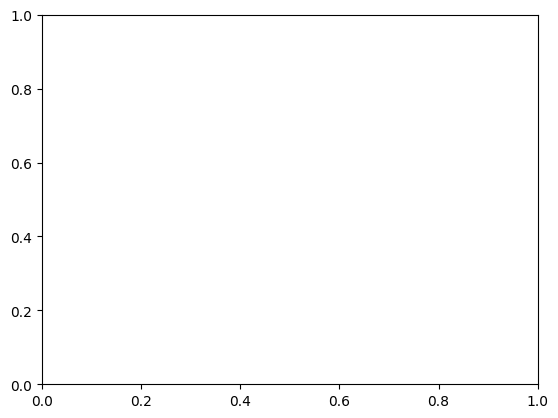

In [ ]:


import sys
import serial
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt6.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QWidget
from PyQt6.QtCore import QTimer, QThread, pyqtSignal

# Main application window
class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Serial Data Plotter")
        self.setGeometry(100, 100, 800, 600)

        # Create a central widget and layout
        self.central_widget = QWidget()
        self.layout = QVBoxLayout(self.central_widget)

        # Create a matplotlib figure and axis
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)
        self.layout.addWidget(self.canvas)

        # Initialize plot
        self.ax.set_xlabel("Time")
        self.ax.set_ylabel("Value")
        self.ax.set_title("Real-Time Data Plot")

        self.data = []
        self.time = []

        # Create a timer for updating the plot
        self.timer = QTimer()
        self.timer.timeout.connect(self.update_plot)
        self.timer.start(100)  # Update plot every 100 ms

        # Initialize serial worker
        self.serial_worker = SerialWorker('COM5', 9600)
        self.serial_worker.data_received.connect(self.handle_data)
        self.serial_worker.start()

        # Set central widget
        self.setCentralWidget(self.central_widget)

    def handle_data(self, value):
        # Append received value to data list
        self.data.append(value)
        self.time.append(len(self.data))  # Simple time index

    def update_plot(self):
        # Clear the previous plot
        self.ax.clear()
        
        # Plot new data
        self.ax.plot(self.time, self.data, label="Data")
        self.ax.set_xlabel("Time")
        self.ax.set_ylabel("Value")
        self.ax.set_title("Real-Time Data Plot")
        self.ax.legend()
        
        # Refresh the canvas
        self.canvas.draw()

    def closeEvent(self, event):
        # Stop the serial worker thread on close
        self.serial_worker.stop()
        super().closeEvent(event)

# Main function to start the application
def main():
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()
    sys.exit(app.exec())

if __name__ == "__main__":
    main()

